###Using Logistic regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score, classification_report, roc_curve

In [ ]:
#Splitting the data
x = loan_df.drop(['default'],axis=1)
y = loan_df['default']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
#Fitting a logistic regression model
model = LogisticRegression(solver='lbfgs')
clf_logistic = model.fit(x_train,np.ravel(y_train))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create predictions of probability for loan status using test data
lr_preds = clf_logistic.predict_proba(x_test)

In [ ]:
#Storing predictions and data labels in a dataframe
lr_preds_df = pd.DataFrame(lr_preds[:,1][0:],columns=['lr_pred_PD'])
true_df = y_test

In [ ]:
#Concatenate the two dataframes for comparison
print(pd.concat([true_df.reset_index(drop=True),lr_preds_df],axis=1))

      default    lr_pred_PD
0           0  2.429196e-06
1           0  6.040504e-01
2           1  1.000000e+00
3           0  1.591345e-04
4           0  4.675465e-05
...       ...           ...
2995        0  1.489101e-09
2996        1  1.000000e+00
2997        0  2.329957e-06
2998        0  6.326180e-06
2999        0  5.689125e-05

[3000 rows x 2 columns]


In [ ]:
import math

In [ ]:
lr_preds_df.round(decimals=2).value_counts()

,count
lr_pred_PD,
0.00,2212
1.00,363
0.01,65
0.99,44
0.02,24
...,...
0.61,1
0.80,1
0.84,1


In [ ]:
y_test.value_counts()

,count
default,
0,2459
1,541


In [ ]:
# Reassign loan status based on the threshold and print the predictions
lr_preds_df['lr_pred_loan_status_60'] = lr_preds_df['lr_pred_PD'].apply(lambda x: 1 if x > 0.60 else 0)
print("Non-Default / Default predictions at 60% Threshhold: ")
print(lr_preds_df['lr_pred_loan_status_60'].value_counts())

Non-Default / Default predictions at 60% Threshhold: 
lr_pred_loan_status_60
0    2481
1     519
Name: count, dtype: int64


In [ ]:
#Print the confusion matrix
print("Confusion matrix at 60% threshold: ")
print(confusion_matrix(y_test,lr_preds_df['lr_pred_loan_status_60']))

Confusion matrix at 60% threshold: 
[[2445   14]
 [  36  505]]


In [ ]:
#Print the classification report
from sklearn.metrics import classification_report

print('Classification Report at 60% threshold: ')
target_names=['Non-Default','Default']
print(classification_report(y_test,lr_preds_df['lr_pred_loan_status_60'],target_names=target_names))

Classification Report at 60% threshold: 
              precision    recall  f1-score   support

 Non-Default       0.99      0.99      0.99      2459
     Default       0.97      0.93      0.95       541

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



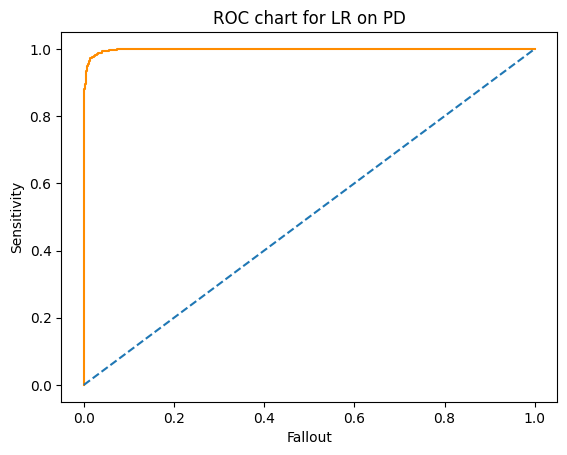

In [ ]:
#Plotting the ROC Curve
lr_prob_default = lr_preds[:,1]
fallout,sensitivity,thresholds = roc_curve(y_test,lr_prob_default)
plt.plot(fallout,sensitivity,color='darkorange')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('Fallout')
plt.ylabel('Sensitivity')
plt.title('ROC chart for LR on PD')
plt.show()

In [ ]:
#Rounding off to see the compared data
lr_preds_df.round(decimals=2)

,lr_pred_PD,lr_pred_loan_status_60
0,0.0,0
1,0.6,1
2,1.0,1
3,0.0,0
4,0.0,0
...,...,...
2995,0.0,0
2996,1.0,1
2997,0.0,0
2998,0.0,0


In [ ]:
#Creating a dataframe without the target
Loans_df = loan_df.drop(['default'],axis=1)
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,income_to_debt,income_to_payment
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,19.931033,14.945650
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,3.238454,13.603576
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,32.481364,19.585647
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,29.722181,15.599407
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,13.256433,17.422978
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,16.717341,14.072707
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,14.651358,19.287238
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,7.935166,12.367199
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,48.825030,15.485222


In [ ]:
# .predict_proba creates an array of probabilities of default: [[non-defualt-0, default-1]]
prob_to_default = clf_logistic.predict_proba(Loans_df)

In [ ]:
#Converting the predicted probabilities into a dataframe
prob_data = pd.DataFrame(prob_to_default[:,1][0:].round(decimals = 2), columns = ['Probability_to_Default'])

In [ ]:
#Adding the predicted probability column to the existing dataset
Loans_df = pd.concat([Loans_df,prob_data],axis=1)
Loans_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,income_to_debt,income_to_payment,Probability_to_Default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,19.931033,14.945650,0.00
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,3.238454,13.603576,0.99
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,32.481364,19.585647,0.00
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,29.722181,15.599407,0.00
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,13.256433,17.422978,0.00
...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,16.717341,14.072707,0.00
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,14.651358,19.287238,0.00
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,7.935166,12.367199,0.01
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,48.825030,15.485222,0.00


In [ ]:
#recovery rate
recovery_rate=0.1

Recovery rate = 10%

This can be used to calculate the expected loss on a loan

In [ ]:
#Loss given Default (LGD)
Loans_df['lgd'] = (1- recovery_rate) * Loans_df['loan_amt_outstanding']

Loss Given Default = (1 - recovery_rate) x outstanding_amount

In [ ]:
#Expected Loss
Loans_df['expected_loss'] = Loans_df['Probability_to_Default']*Loans_df['lgd']

Expected Loss = Default probability * LGD

In [ ]:
#Sort the dataframe according to decreasing rate of expected loss
Loans_df.sort_values('expected_loss',ascending=False)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,income_to_debt,income_to_payment,Probability_to_Default,lgd,expected_loss
1997,6597386,5,10210.746690,33515.971170,107870.38960,2,649,3.218477,10.564398,1.0,9189.672021,9189.672021
2138,1998635,5,9563.693515,28825.601850,112120.62640,3,641,3.889620,11.723570,1.0,8607.324164,8607.324164
9203,4836461,5,9105.964213,42558.451490,133913.38230,3,601,3.146576,14.706118,1.0,8195.367792,8195.367792
9944,3983392,4,8989.178801,30103.662560,124197.63370,2,641,4.125665,13.816349,1.0,8090.260921,8090.260921
5460,2527305,5,8841.923630,32644.921580,115203.15190,2,541,3.528976,13.029196,1.0,7957.731267,7957.731267
...,...,...,...,...,...,...,...,...,...,...,...,...
3822,4852626,0,2347.870065,728.786824,72878.68237,5,636,100.000000,31.040339,0.0,2113.083059,0.000000
3824,5387202,0,5023.085666,8183.306718,97075.43796,3,698,11.862618,19.325858,0.0,4520.777099,0.000000
3825,5644865,0,1906.390298,1799.098281,39298.79573,5,640,21.843607,20.614245,0.0,1715.751268,0.000000
3826,7950830,0,3987.214098,4711.229632,56034.93698,4,608,11.893909,14.053656,0.0,3588.492688,0.000000


###Using XGboost

In [ ]:
import xgboost as xgb

In [ ]:
loan_df = pd.read_csv('/content/drive/MyDrive/Case Studies/JP Morgan&Chase/Task 3/Loan_Data.csv')
loan_df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [ ]:
#Splitting the data
x = loan_df.drop(['default'],axis=1)
y = loan_df['default']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
#Fit an XGboost model
model = xgb.XGBClassifier(random_state=42)
clf_xgb = model.fit(x_train,np.ravel(y_train))

In [ ]:
# Create predictions of probability for loan status using test data
xgb_preds = clf_xgb.predict_proba(x_test)

In [ ]:
# Create dataframes of predictions and labels
xgb_preds_df = pd.DataFrame(xgb_preds[:,1][0:], columns = ['xgb_pred_PD'])
true_df = y_test

In [ ]:
# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), xgb_preds_df], axis = 1))

      default   xgb_pred_PD
0           0  2.838911e-06
1           0  4.153239e-04
2           1  9.999608e-01
3           0  3.825227e-05
4           0  7.589432e-07
...       ...           ...
2995        0  1.710370e-06
2996        1  9.999812e-01
2997        0  2.351578e-06
2998        0  1.294795e-06
2999        0  1.417789e-06

[3000 rows x 2 columns]


In [ ]:
# Reassign loan status based on the threshold and print the predictions
xgb_preds_df['xgb_pred_loan_status_60'] = xgb_preds_df['xgb_pred_PD'].apply(lambda x: 1 if x > 0.60 else 0)
print("Non-Default / Default  predictions at 60% Threshhold: ")
print(xgb_preds_df['xgb_pred_loan_status_60'].value_counts())

Non-Default / Default  predictions at 60% Threshhold: 
xgb_pred_loan_status_60
0    2464
1     536
Name: count, dtype: int64


In [ ]:
# Print the confusion matrix
print("Confusion Matrix at 60% Threshhold: ")
print(confusion_matrix(y_test, xgb_preds_df['xgb_pred_loan_status_60']))

Confusion Matrix at 60% Threshhold: 
[[2455    4]
 [   9  532]]


In [ ]:
# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, xgb_preds_df['xgb_pred_loan_status_60'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       1.00      1.00      1.00      2459
     Default       0.99      0.98      0.99       541

    accuracy                           1.00      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000



In [ ]:
# Print the accuracy score the model
print(clf_xgb.score(x_test, y_test))

0.9956666666666667


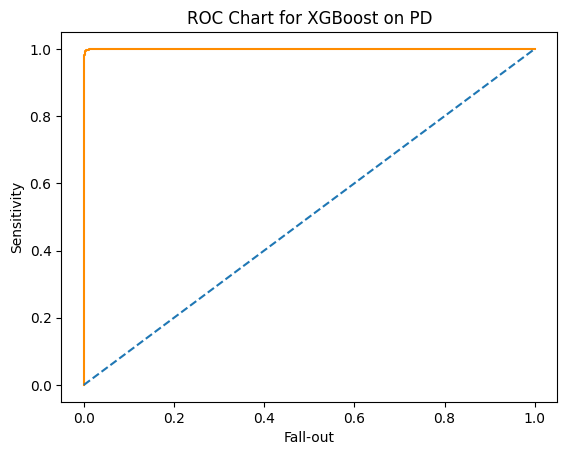

In [ ]:
# Plot the ROC curve of the probabilities of default
xgb_prob_default = xgb_preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, xgb_prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Chart for XGBoost on PD")
plt.xlabel("Fall-out")
plt.ylabel("Sensitivity")
plt.show()

In [ ]:
# Compute the AUC and store it in a variable
xgb_auc = roc_auc_score(y_test, xgb_prob_default)

In [ ]:
xgb_preds_df

,xgb_pred_PD,xgb_pred_loan_status_60
0,2.838911e-06,0
1,4.153239e-04,0
2,9.999608e-01,1
3,3.825227e-05,0
4,7.589432e-07,0
...,...,...
2995,1.710370e-06,0
2996,9.999812e-01,1
2997,2.351578e-06,0
2998,1.294795e-06,0


In [ ]:
loan_df['default'].value_counts()

,count
default,
0,8149
1,1851


In [ ]:
loan_df.drop(['default'], axis=1,inplace=True)

In [ ]:
Prob_to_default = clf_xgb.predict_proba(loan_df)

In [ ]:
prob_data = pd.DataFrame(Prob_to_default[:,1][0:].round(decimals = 2), columns = ['Probability_to_Default'])

In [ ]:
prob_data['Probability_to_Default'].apply(lambda x: 1 if x > 0.60 else 0).value_counts()

,count
Probability_to_Default,
0,8153
1,1847


In [ ]:
loan_df=pd.concat([loan_df, prob_data], axis = 1)

In [ ]:
# Recovery rate
recovery_rate = 0.1

In [ ]:
# Loss Given Default (LGD)
loan_df['lgd'] = (1 - recovery_rate) * loan_df['loan_amt_outstanding']

In [ ]:
# Expected Loss

loan_df['expected_loss'] = loan_df['Probability_to_Default'] * loan_df['lgd']


In [ ]:
loan_df.sort_values('expected_loss',ascending=False)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,Probability_to_Default,lgd,expected_loss
1997,6597386,5,10210.746690,33515.971170,107870.38960,2,649,1.0,9189.672021,9189.672021
2138,1998635,5,9563.693515,28825.601850,112120.62640,3,641,1.0,8607.324164,8607.324164
9203,4836461,5,9105.964213,42558.451490,133913.38230,3,601,1.0,8195.367792,8195.367792
9944,3983392,4,8989.178801,30103.662560,124197.63370,2,641,1.0,8090.260921,8090.260921
5460,2527305,5,8841.923630,32644.921580,115203.15190,2,541,1.0,7957.731267,7957.731267
...,...,...,...,...,...,...,...,...,...,...
3705,5621610,2,4717.355793,10284.295580,76884.36959,7,752,0.0,4245.620214,0.000000
3707,5023473,0,3833.870426,2839.164662,78009.59917,5,581,0.0,3450.483383,0.000000
3708,1928095,0,5001.257681,2896.388290,62897.36376,3,654,0.0,4501.131913,0.000000
3709,1242932,1,2357.027754,6625.482856,54591.80613,6,725,0.0,2121.324979,0.000000
